<a href="https://colab.research.google.com/github/alizul01/2141720088-PCVK-2023/blob/main/Kuis_2_PCVK_Kelompok_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kuis 2 - KTP Preprocessing and Recognition

Kelompok 4
1. Ilham Yudantyo (2141720091)
2. Mohammad Izamul Fikri Fahmi (2141720171)
3. Muhammad Ali Zulfikar (2141720088)
4. Septi Lutfiana (2141720038)
5. Ulfi Mustatiq Abidatul Izza (2141720052)

## Task

1. Work in groups consisting of 5 members
2. Collect e-KTPs of family or **class members in groups of at least 5** as a dataset. 1 photo can be in various poses when taking an e-KTP photo.
detect and recognize e-KTP facial photos using methods that have been studied both in the PCVK course and other courses this semester.
3. Present in front of the class the results of your group's work, explain the results of the work in detail complete with screenshots of parts of;
  - pre-processing,
  - localization
  - segmentation
  - recognition.
4. Don't forget to also upload the program code to the repository, and
5. Collect presentation file links in pdf form and repository links.

## Library Area

In [89]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image
from sklearn.pipeline import make_pipeline

from google.colab.patches import cv2_imshow
from google.colab import drive

from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

from imutils.perspective import four_point_transform

### Drive Mounter

In [7]:
drive.mount('/content/drive')

Mounted at /content/drive


## Method Area

### Preprocessing

In [74]:
def display_images(images, titles):
    fig, axs = plt.subplots(1, 5, figsize=(20, 20))
    for i in range(5):
        axs[i].imshow(images[i], cmap='gray')
        axs[i].set_title(titles[i])
        axs[i].axis('off')
    plt.show()

### Face Detection

In [67]:
def crop_face(img, scaleFactor=1.1, minNeighbors=5, classifier='haarcascade_frontalface_alt.xml', padding_y=80):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    haar_cascade = cv2.CascadeClassifier(classifier)

    if haar_cascade.empty():
        raise ValueError("Haar cascade classifier not loaded successfully.")

    rectangles = haar_cascade.detectMultiScale(img_gray, scaleFactor, minNeighbors)

    if len(rectangles) == 0:
        raise ValueError("No face detected in the image.")

    (x, y, w, h) = rectangles[0]
    y = max(0, y - padding_y)
    h = min(img.shape[0] - 1, h + 2 * padding_y)
    cropped_face = img[y:y+h, x:x+w]

    return cropped_face

def face_detection(img, scaleFactor=1.1, minNeighbors=5, classifier='haarcascade_frontalface_alt.xml'):
    """
    Detect faces in an image using Haar cascade classifier.

    Parameters:
    - img: Input image
    - scaleFactor: Parameter specifying how much the image size is reduced at each image scale
    - minNeighbors: Parameter specifying how many neighbors each candidate rectangle should have to retain it
    - classifier: Path to the Haar cascade classifier XML file

    Returns:
    - img_rectangle: Image with rectangles drawn around detected faces
    """
    img_rectangle = img.copy()
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    haar_cascade = cv2.CascadeClassifier(classifier)

    if haar_cascade.empty():
        raise ValueError("Haar cascade classifier not loaded successfully.")

    rectangles = haar_cascade.detectMultiScale(img_gray, scaleFactor, minNeighbors)

    for (x, y, w, h) in rectangles:
        cv2.rectangle(img_rectangle, (x, y), (x+w, y+h), (0, 255, 0), 3)

    return img_rectangle

### Recognition

In [100]:
def preprocess_image(file_path):
    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    image = Image.open(file_path).convert("RGB")
    size = (224, 224)
    image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)
    image_array = np.asarray(image)
    normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1
    data[0] = normalized_image_array
    return data, image_array

def predict_image(model, image_data, class_names):
    prediction = model.predict(image_data)
    index = np.argmax(prediction)
    class_name = class_names[index]
    confidence_score = prediction[0][index]
    return class_name, confidence_score

## Main Area

### Folder Names

In [80]:
names = ['alizul', 'fikri', 'ilham', 'septi', 'izza']
images = []

### Folder Importer

#### Loop images dalam folder

In [81]:
for name in names:
  image_path = f'/content/drive/MyDrive/ktp-pcvk-kelompok-4/{name}/1.jpg'
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  cropped_face = crop_face(img)
  images.append(cropped_face)

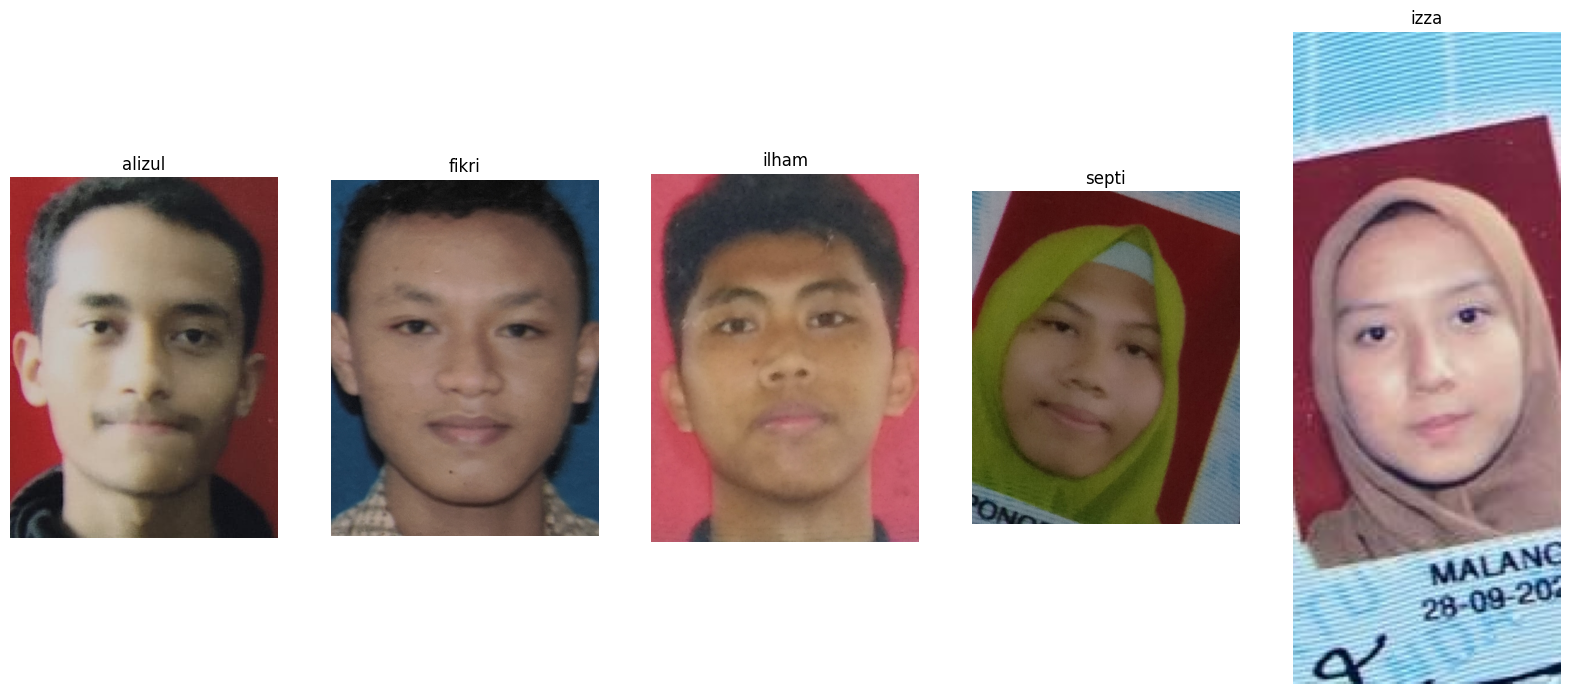

In [82]:
display_images(images, names)

#### Image Exporter

In [87]:
for i, image in enumerate(images):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  cv2.imwrite(f"{i}.jpg", image)

### Model

In [95]:
np.set_printoptions(suppress=True)
model = load_model("./keras_model.h5", compile=False)
class_names = open("labels.txt", "r").readlines()

### Recognition

In [96]:
image_dir = './image/'

for filename in os.listdir(image_dir):
    if filename.endswith(".jpg"):
        file_path = os.path.join(image_dir, filename)
        image_data = preprocess_image(file_path)
        class_name, confidence_score = predict_image(model, image_data, class_names)

        print(f"File: {filename}")
        print(f"Predicted Class: {class_name}")
        print(f"Confidence Score: {confidence_score}")
        print("\n")

1/1 [==============================] - 2s 2s/step
File: 2.jpg
Predicted Class: 1 Ilham

Confidence Score: 0.6260475516319275


1/1 [==============================] - 0s 46ms/step
File: 3.jpg
Predicted Class: 3 Septi

Confidence Score: 0.9004600048065186


1/1 [==============================] - 0s 40ms/step
File: 0.jpg
Predicted Class: 0 Alizul

Confidence Score: 0.9405743479728699


1/1 [==============================] - 0s 45ms/step
File: 1.jpg
Predicted Class: 0 Alizul

Confidence Score: 0.9402249455451965


1/1 [==============================] - 0s 48ms/step
File: 4.jpg
Predicted Class: 2 Izza

Confidence Score: 0.9948586225509644




1/1 [==============================] - 0s 82ms/step


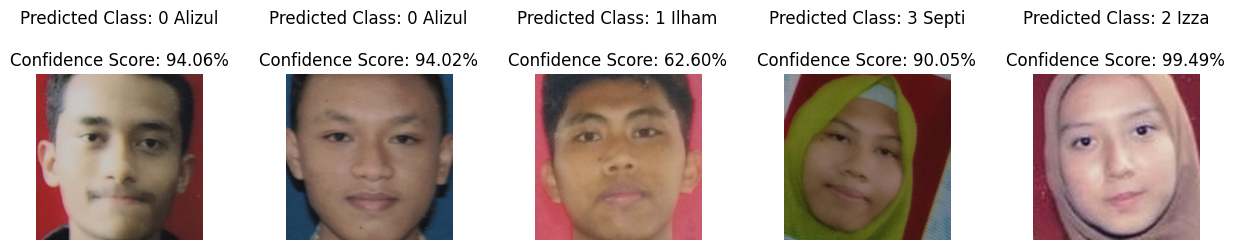

In [104]:
fig, axs = plt.subplots(1, len(os.listdir(image_dir)), figsize=(15, 5))

# Iterate through all images in the directory
for i, filename in enumerate(sorted(os.listdir(image_dir))):
    if filename.endswith(".jpg"):
        file_path = os.path.join(image_dir, filename)
        image_data, original_image = preprocess_image(file_path)
        class_name, confidence_score = predict_image(model, image_data, class_names)

        axs[i].imshow(original_image)
        formatted_confidence = "{:.2%}".format(confidence_score)  # Format confidence to two decimal places and percentage
        axs[i].set_title(f"Predicted Class: {class_name}\nConfidence Score: {formatted_confidence}")
        axs[i].axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Save the plot with the predicted labels
plt.savefig("predictions_combined.jpg")
plt.show()